## Load Data

In [1]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [2]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Better Optimizer

In [3]:
# solution 3: Better optimizer
initializer = tf.keras.initializers.RandomNormal()

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(10))

model.compile(optimizer= tf.keras.optimizers.Adam(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])
# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=300, verbose=2)

Epoch 1/300
118/118 - 4s - loss: 2.2995 - accuracy: 0.1173 - val_loss: 2.0532 - val_accuracy: 0.1974 - 4s/epoch - 32ms/step
Epoch 2/300
118/118 - 1s - loss: 1.5811 - accuracy: 0.3167 - val_loss: 1.2902 - val_accuracy: 0.4536 - 505ms/epoch - 4ms/step
Epoch 3/300
118/118 - 1s - loss: 1.1748 - accuracy: 0.4756 - val_loss: 1.1135 - val_accuracy: 0.5004 - 523ms/epoch - 4ms/step
Epoch 4/300
118/118 - 0s - loss: 1.0817 - accuracy: 0.5245 - val_loss: 1.1042 - val_accuracy: 0.5043 - 500ms/epoch - 4ms/step
Epoch 5/300
118/118 - 1s - loss: 1.0489 - accuracy: 0.5349 - val_loss: 1.0452 - val_accuracy: 0.5431 - 531ms/epoch - 5ms/step
Epoch 6/300
118/118 - 1s - loss: 1.0110 - accuracy: 0.5703 - val_loss: 1.0127 - val_accuracy: 0.5851 - 527ms/epoch - 4ms/step
Epoch 7/300
118/118 - 0s - loss: 0.9572 - accuracy: 0.5953 - val_loss: 0.9337 - val_accuracy: 0.5924 - 499ms/epoch - 4ms/step
Epoch 8/300
118/118 - 1s - loss: 0.9106 - accuracy: 0.6100 - val_loss: 0.9044 - val_accuracy: 0.6228 - 521ms/epoch - 4ms

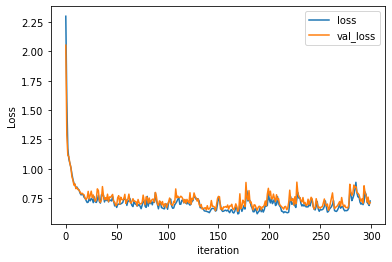

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

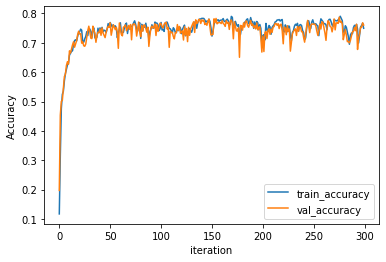

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()